# Radar phase

This notebook demonstrates how phase of EM radiation can be used by radars.

First, let's plot some waves. You can change the wavelength, phase and amplitude by altering the numbers on the first three lines. To plot the wave, click on the cell and press the **Run** button at the top of the page.

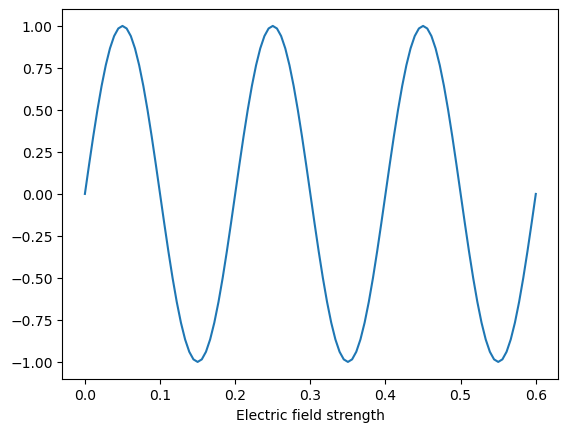

In [7]:
# the properties of the wave
A=1.0   # amplitude
l=0.2   # wavelength in metres
p=0.0   # phase in degrees


# python code below. Do not modify.
import numpy as np
from math import pi
from matplotlib import pyplot as plt

# make arrays of data
c=2.998*10**8
x=np.arange(0,l*3,l/36)
y=np.sin(x*2*pi/l+p*pi/180)

plt.plot(x,y)
plt.xlabel("Distance (m)")
plt.xlabel("Electric field strength")
plt.show()

